In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Exploratory Data Analysis (EDA)

In [173]:
#load the dataset
df=pd.read_csv('wine.csv')
df.shape

(178, 14)

In [174]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [175]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [177]:
df.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [178]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [179]:
df.duplicated().sum()

0

In [180]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


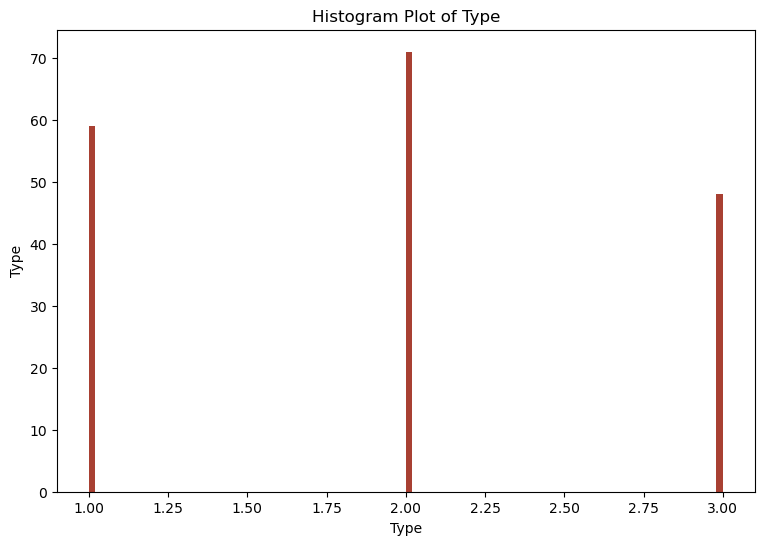

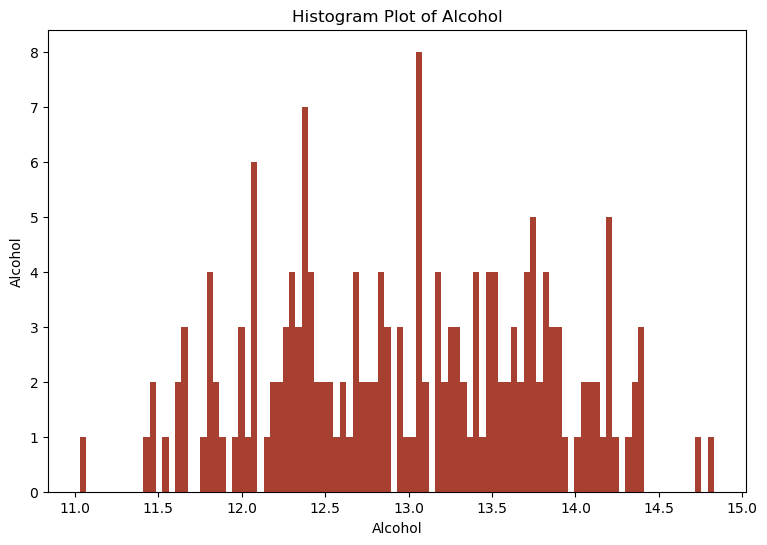

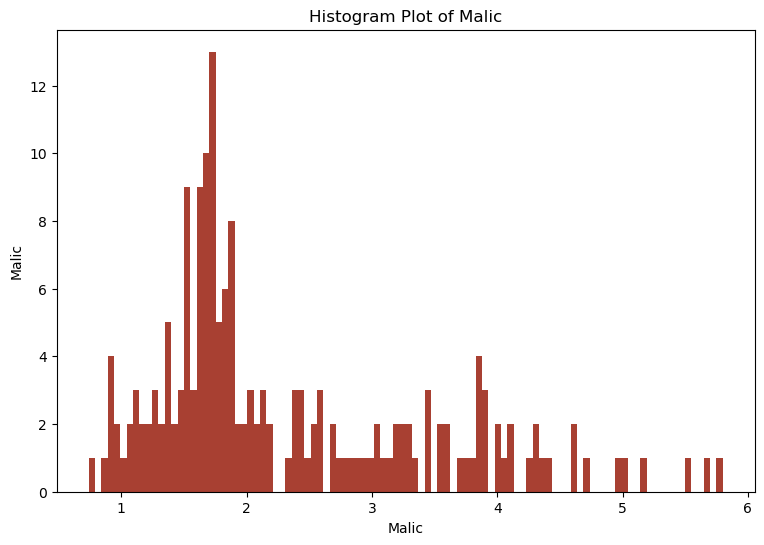

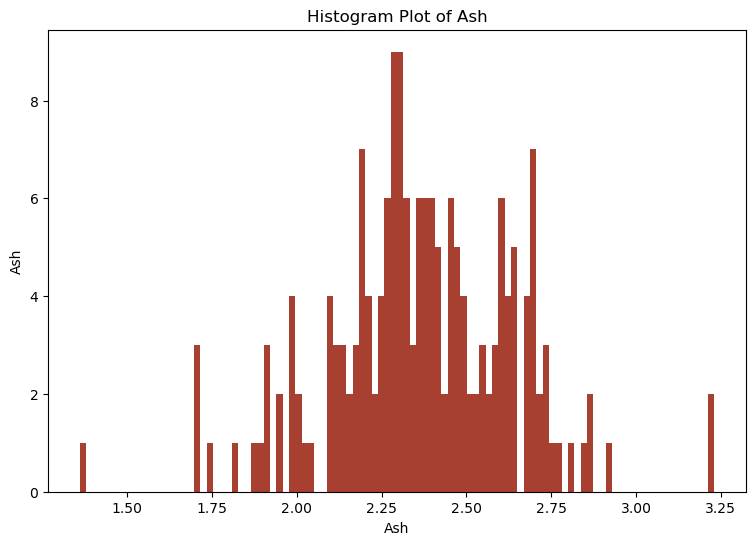

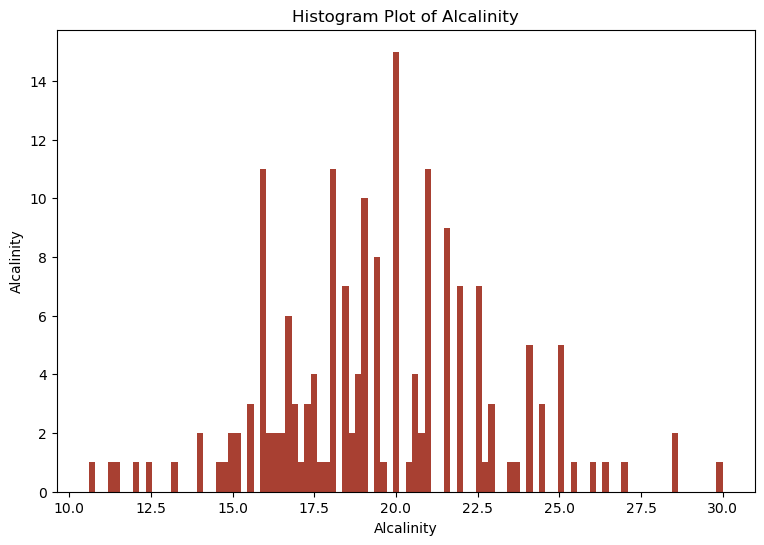

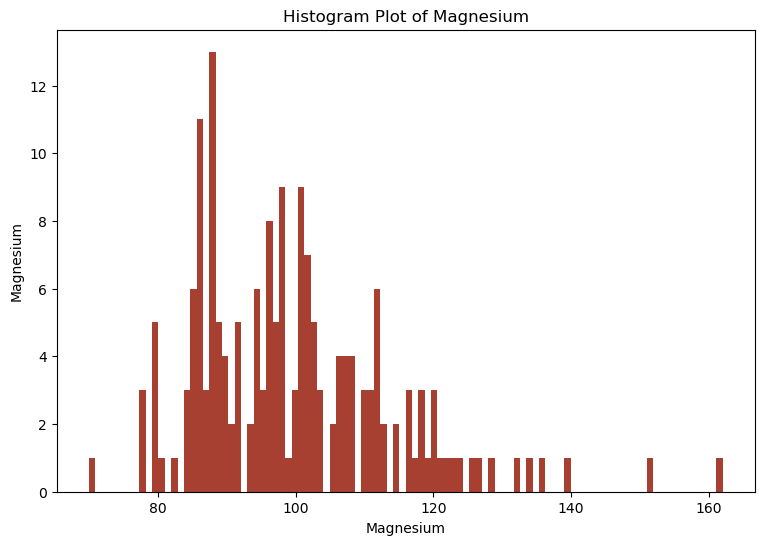

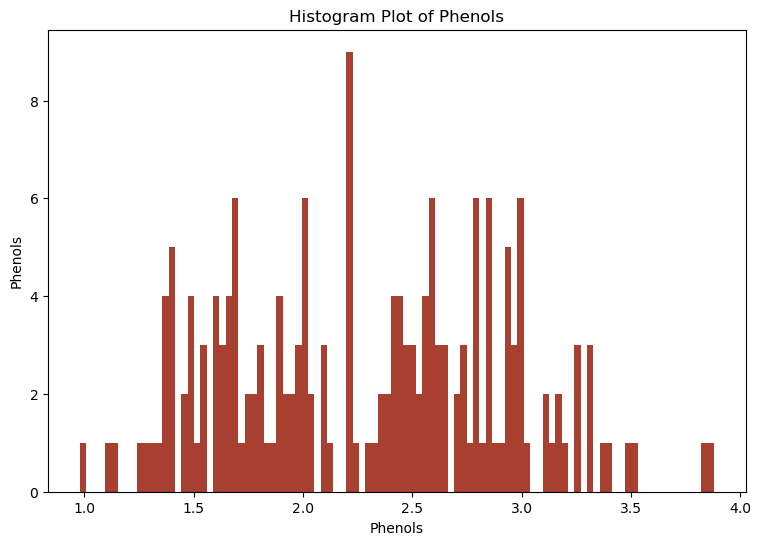

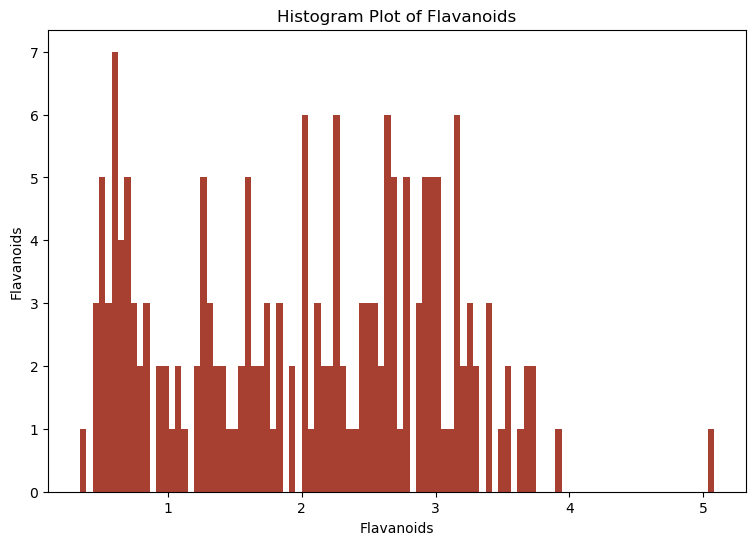

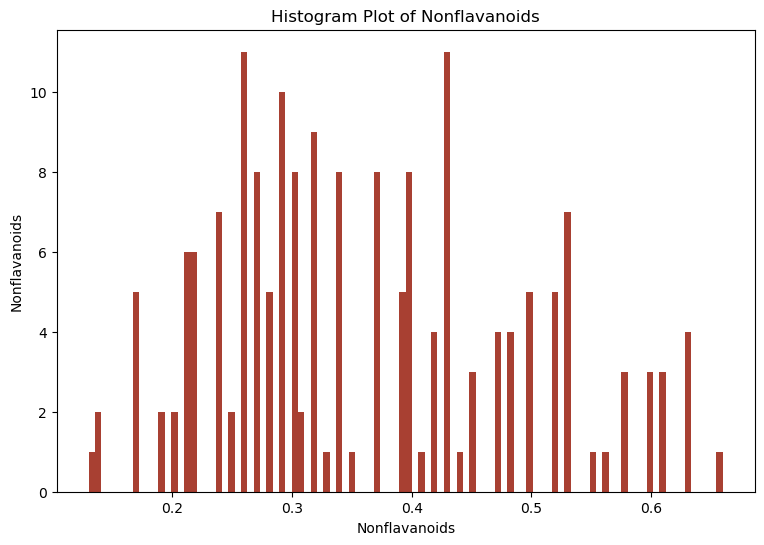

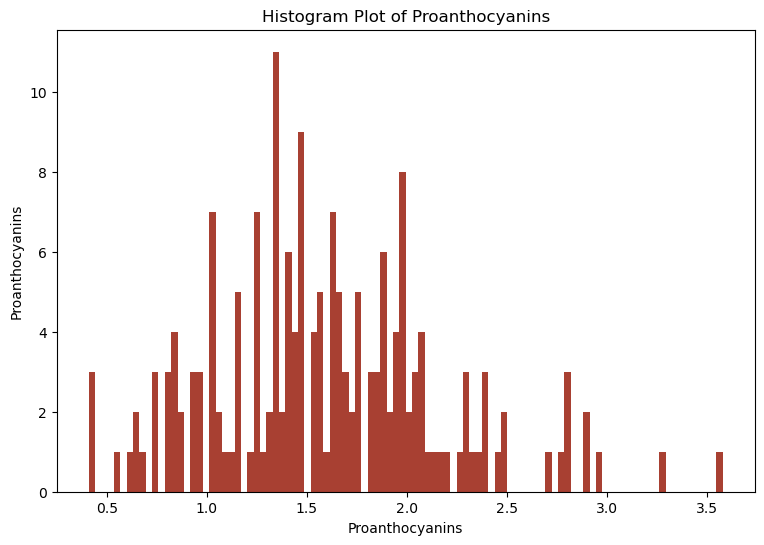

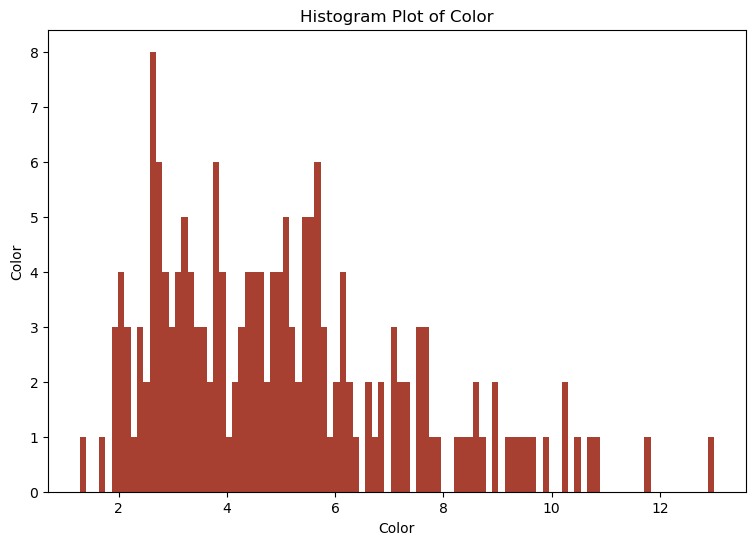

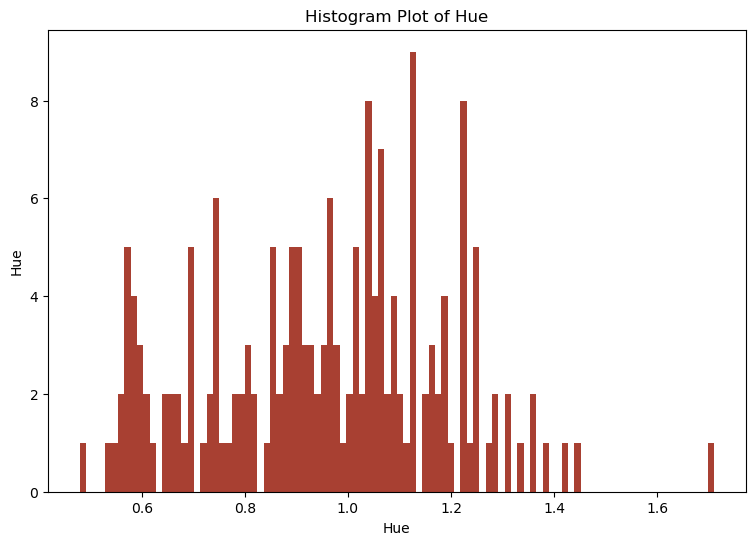

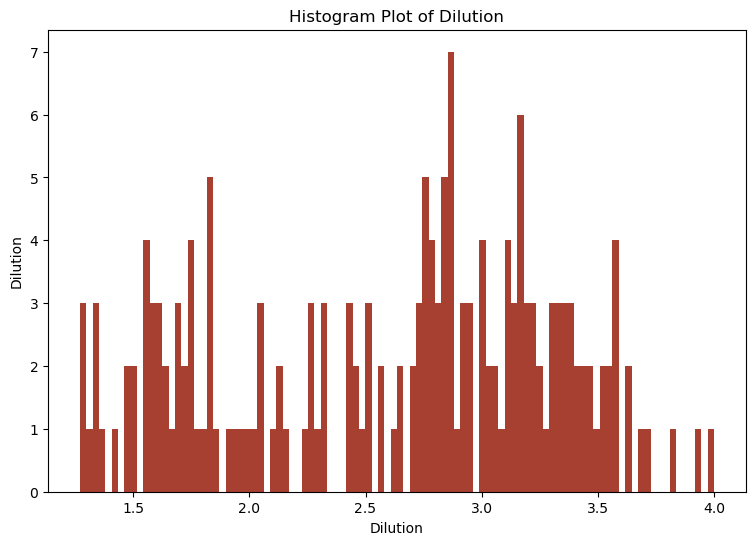

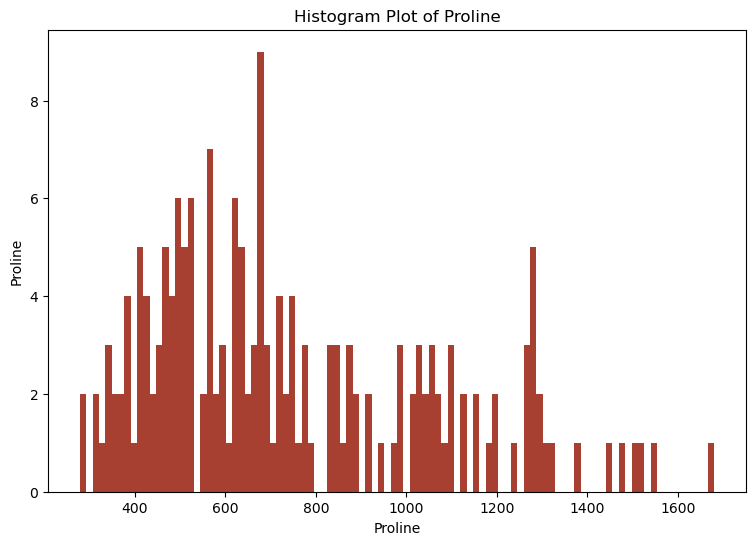

In [181]:
for col in df:
    plt.figure(figsize=(9,6))
    plt.hist(df[col],bins=100, color='#a84032')
    plt.title(f'Histogram Plot of {col}')
    plt.xlabel(col)
    plt.ylabel(col)
    plt.show()
    

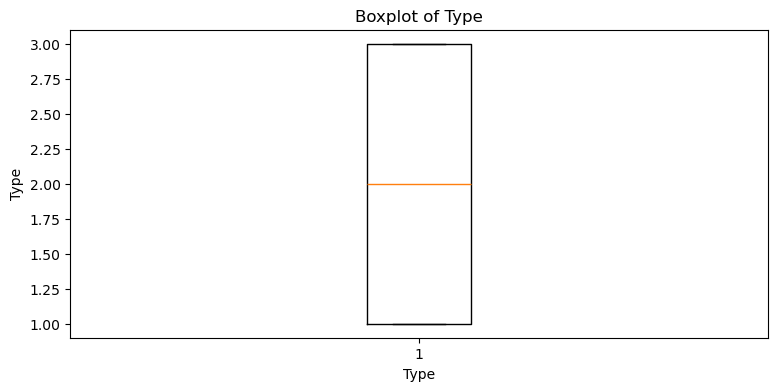

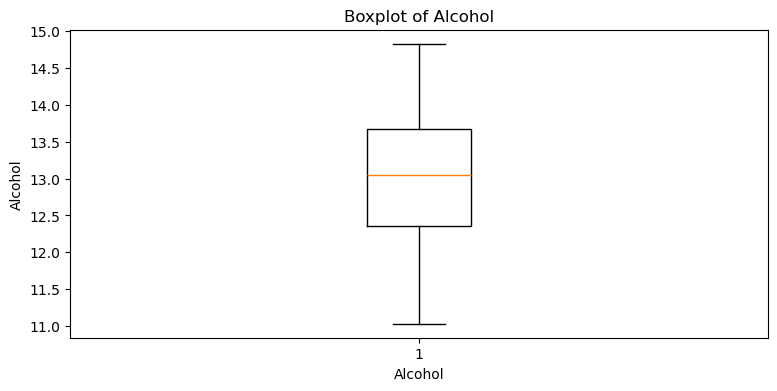

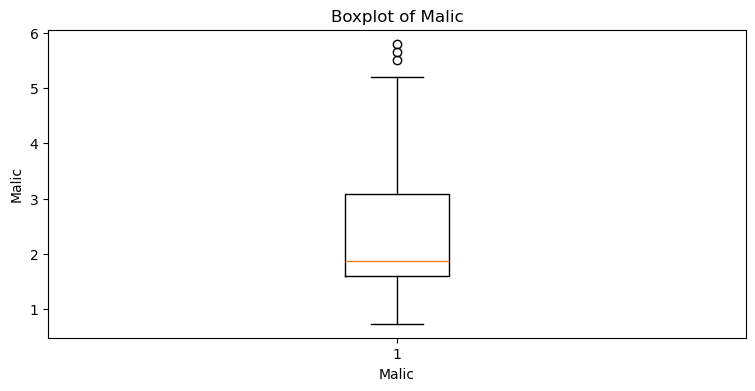

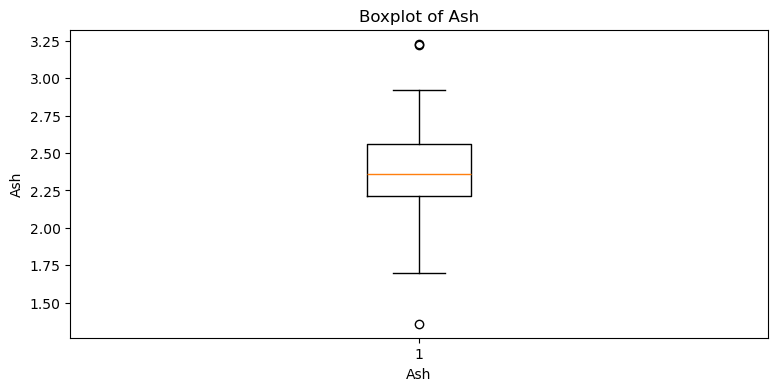

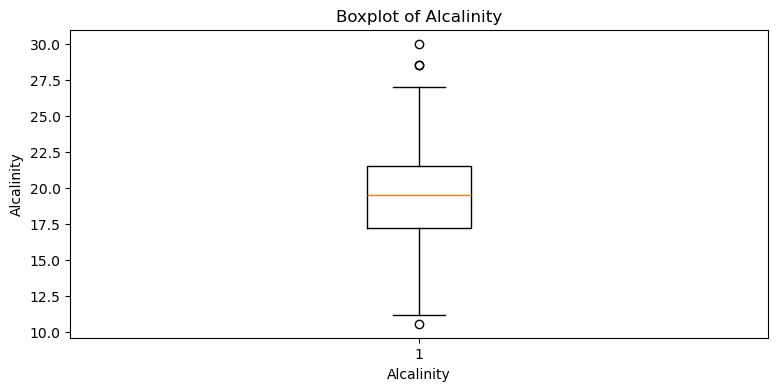

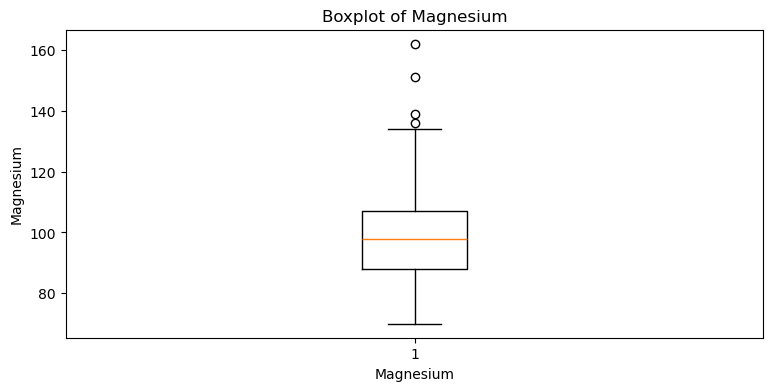

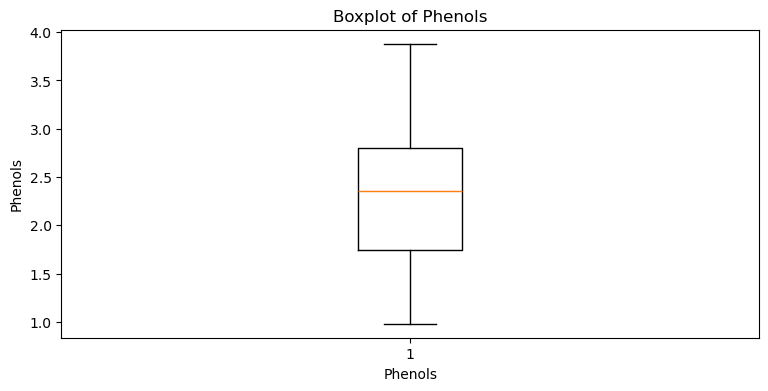

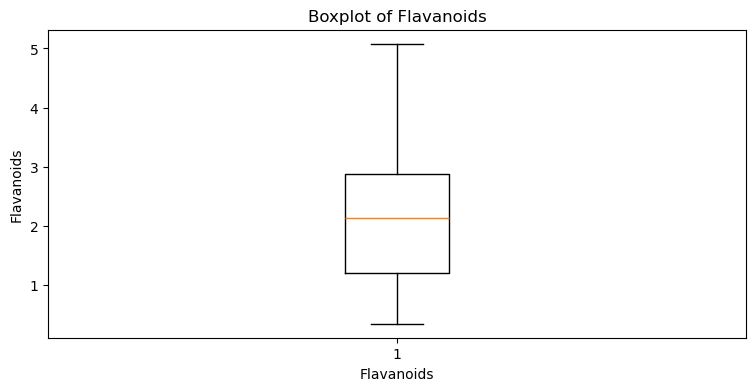

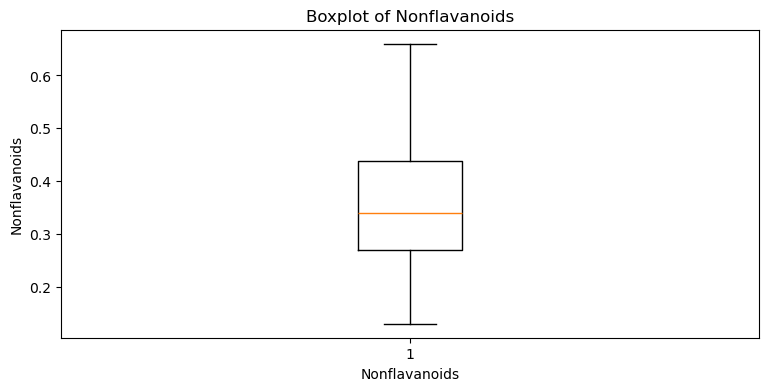

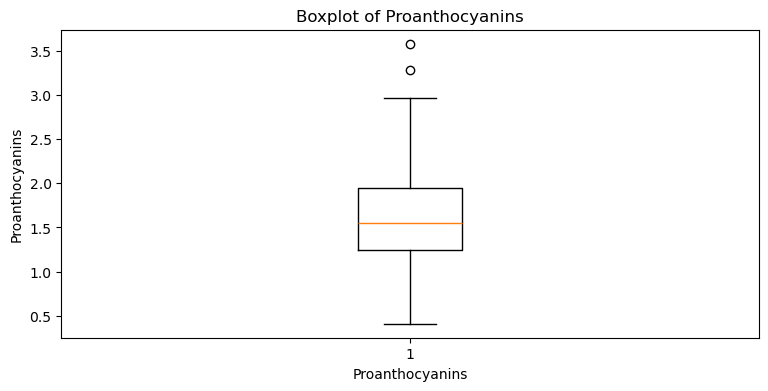

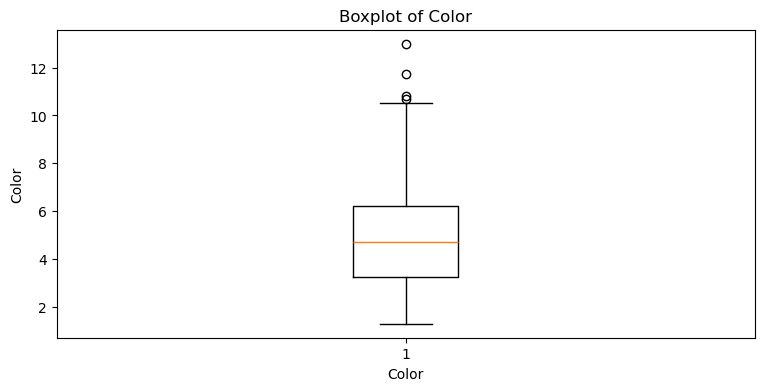

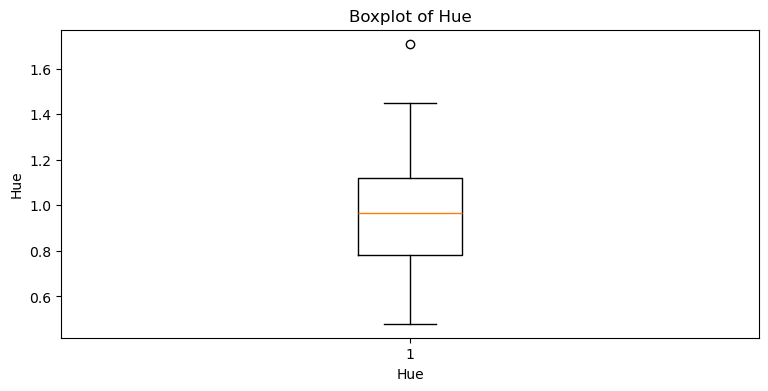

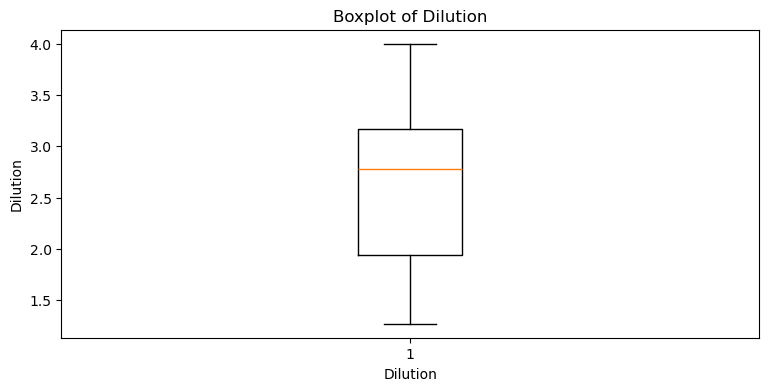

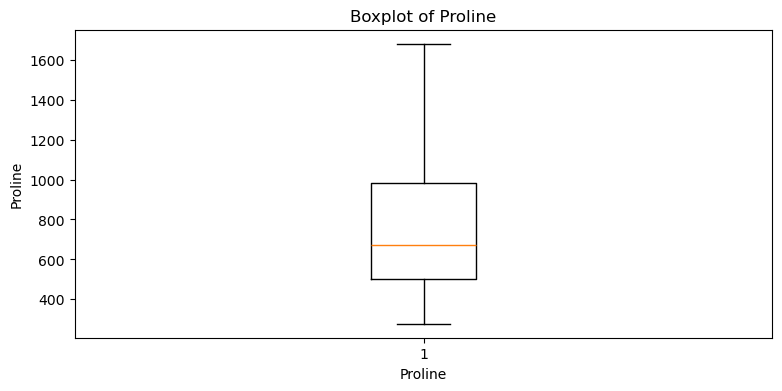

In [182]:
for col in df:
    plt.figure(figsize=(9,4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel(col)
    plt.show()

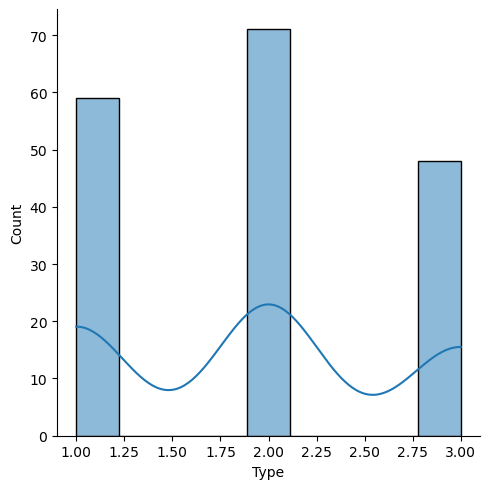

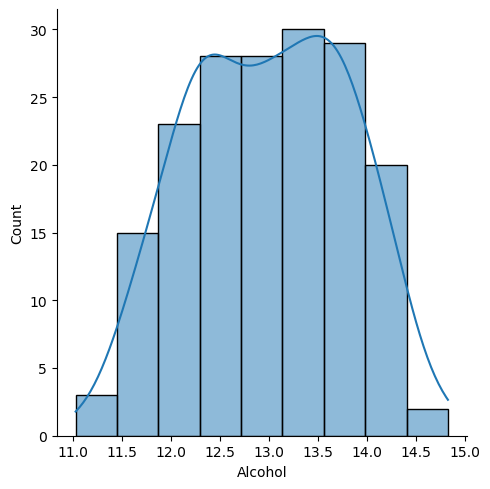

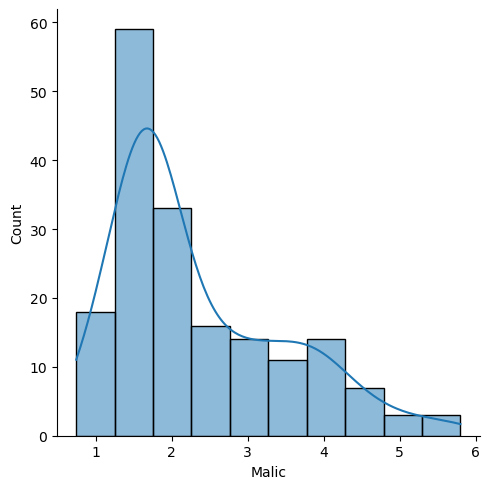

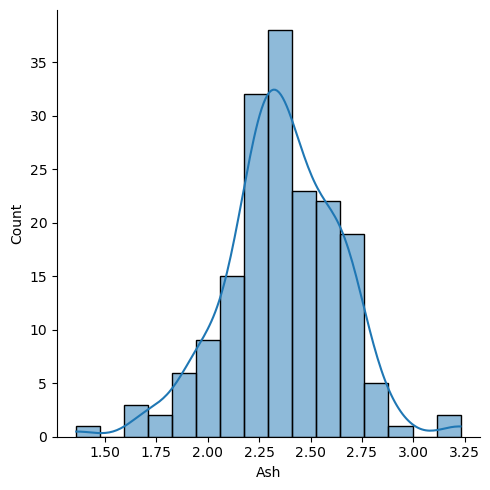

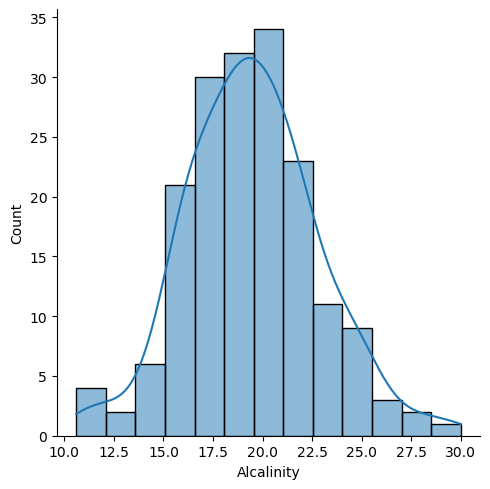

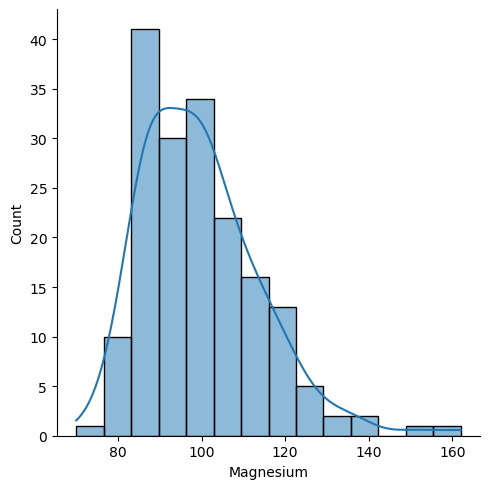

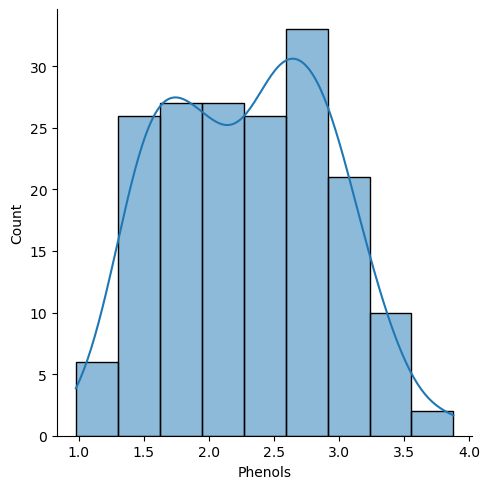

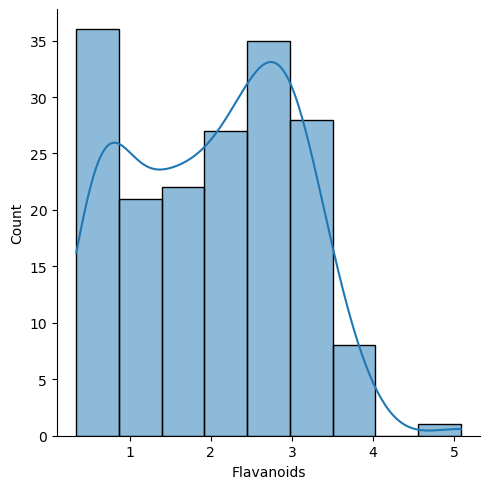

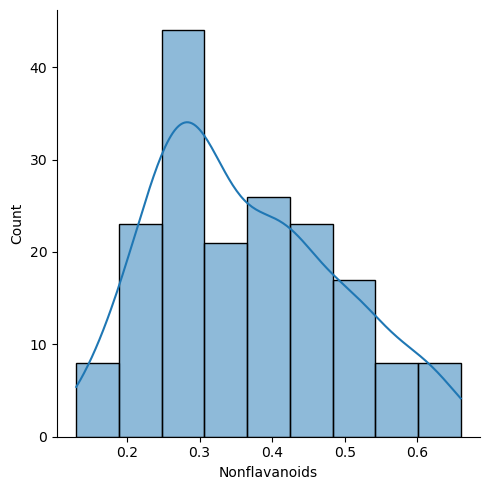

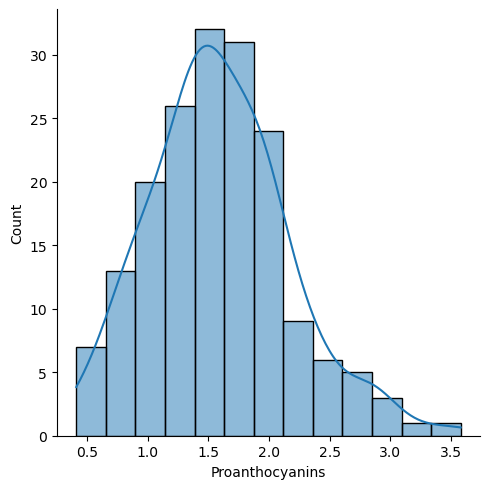

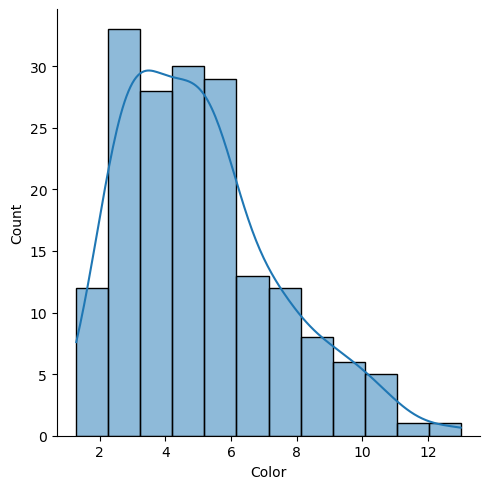

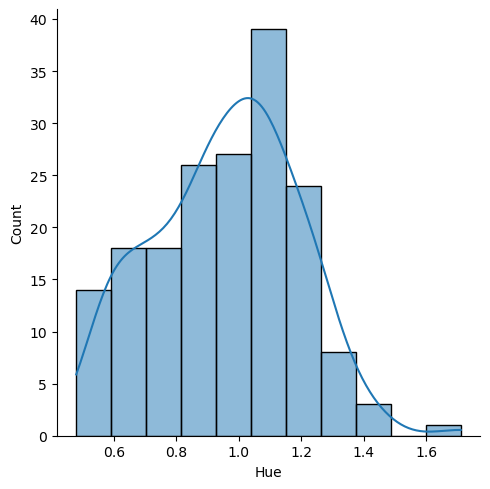

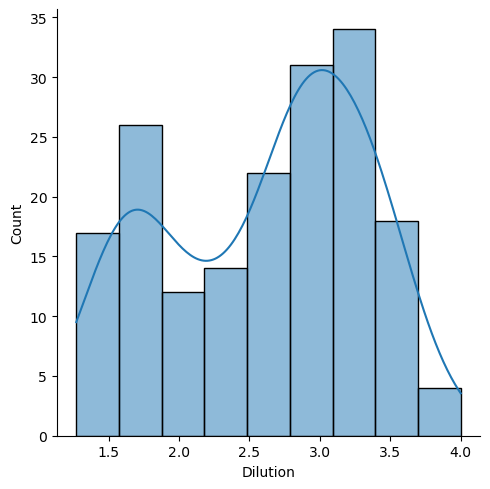

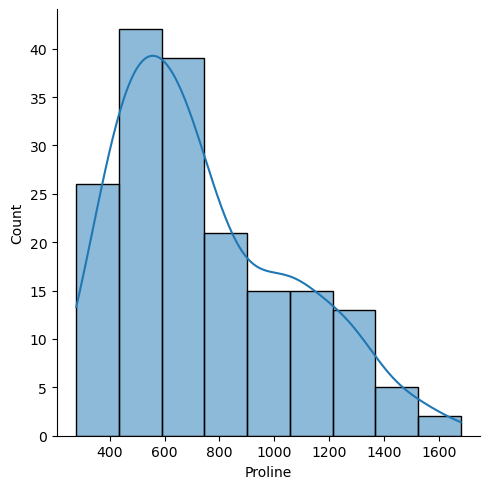

In [183]:
for col in df:
    sns.displot(df[col],kde=True)
    plt.show()

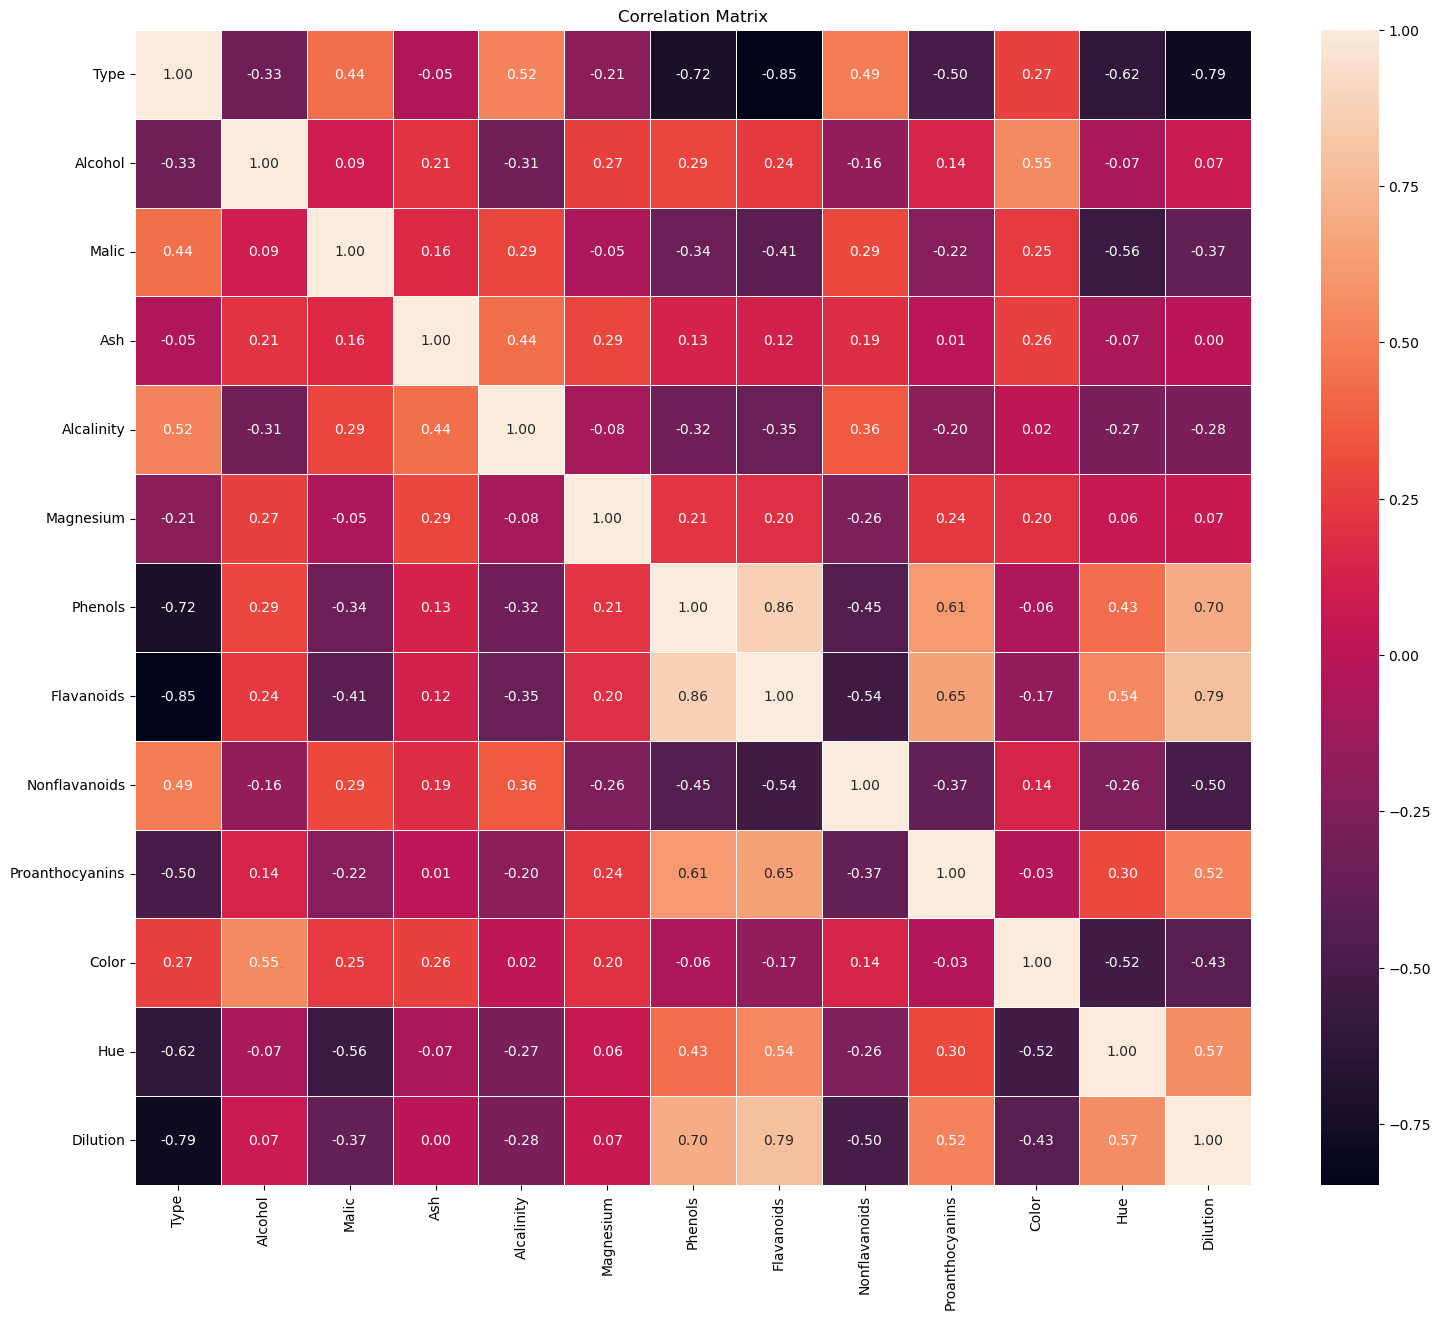

In [184]:
#correlation heatmap
corr_matrix=df.iloc[:,:-1].corr()
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(corr_matrix, annot=True,linewidth=.6, fmt='.2f',ax=ax)
plt.title("Correlation Matrix")
plt.show()


Original Data Shape: (178, 14)
Cleaned Data Shape (After Removing Outliers): (168, 14)


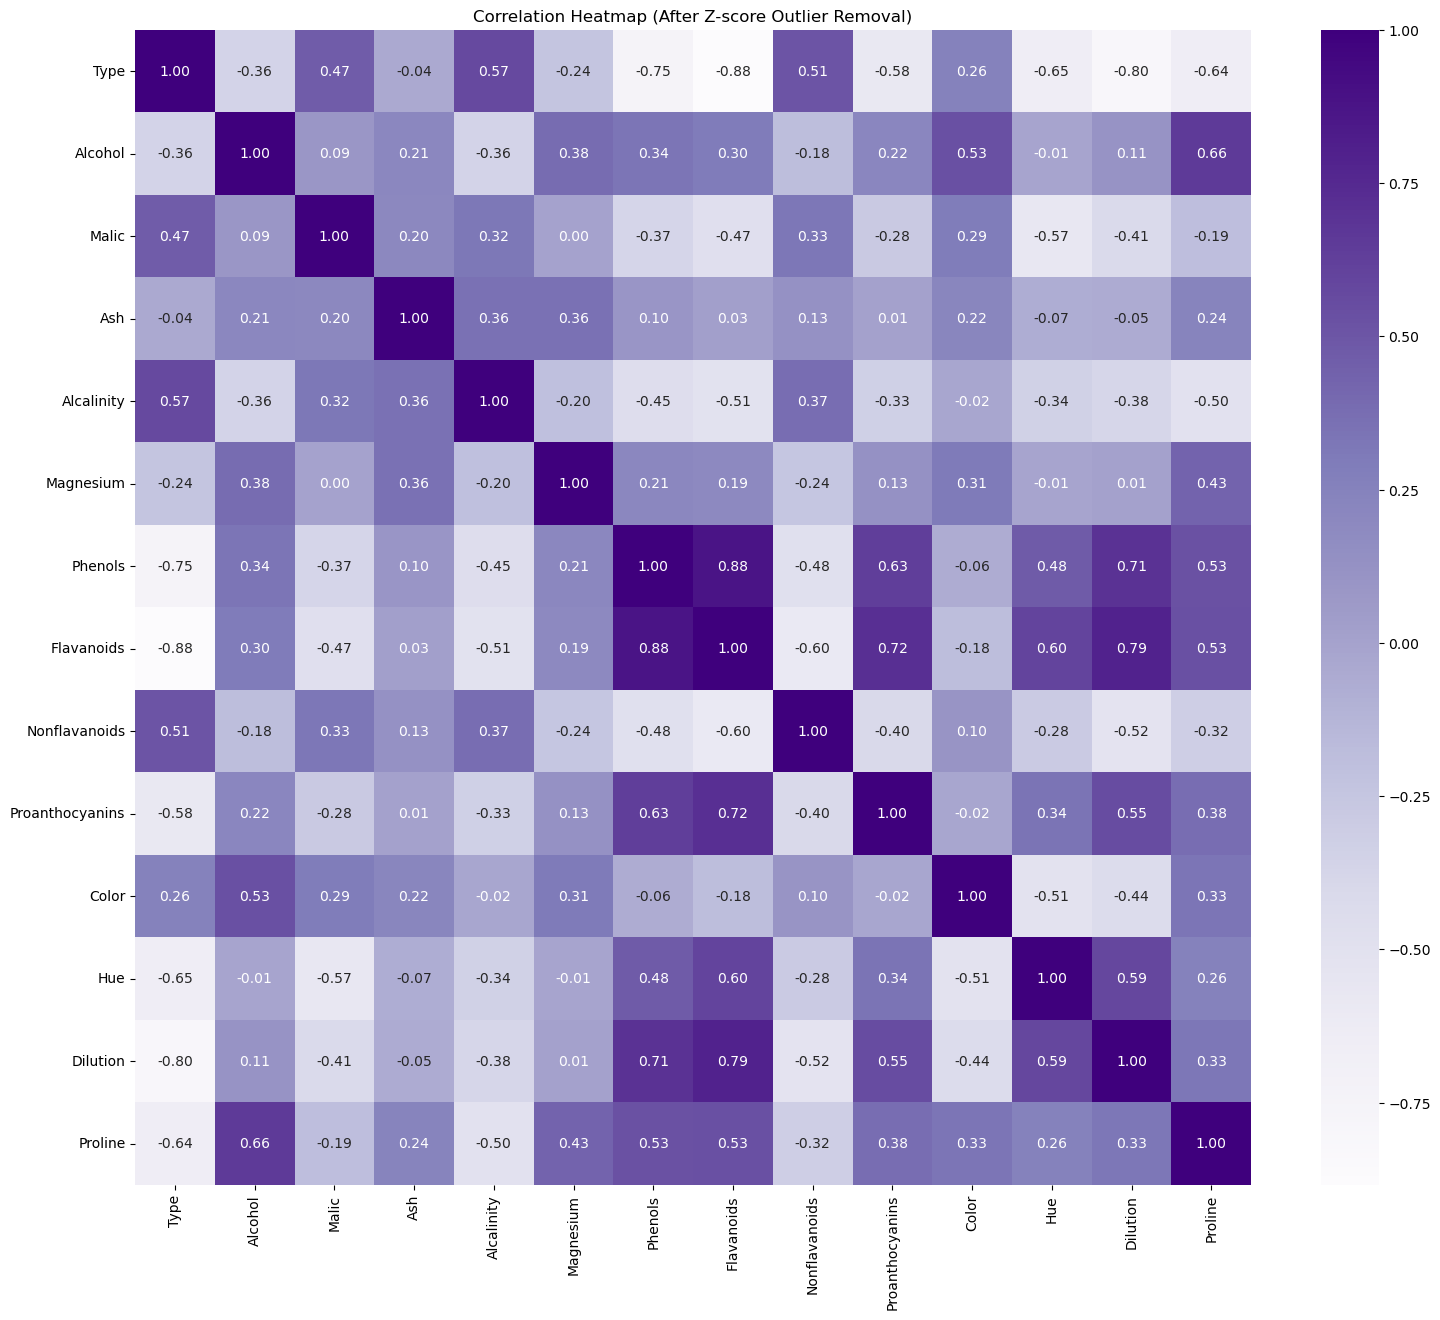

In [185]:
from scipy.stats import zscore

# Calculate the z-scores for each feature
z_scores = df.apply(zscore)

# Filter data where absolute z-scores are less than 3 for all columns
df_clean = df[(z_scores.abs() < 3).all(axis=1)]

print("Original Data Shape:", df.shape)
print("Cleaned Data Shape (After Removing Outliers):", df_clean.shape)

# Calculate correlation matrix
correlation_matrix = df_clean.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Heatmap (After Z-score Outlier Removal)')
plt.show()


In [186]:
df2=df_clean
df2.shape

(168, 14)

In [187]:
df3=df2.drop(columns=['Type','Ash','Malic','Alcalinity','Phenols','Color','Nonflavanoids'])
df3.shape

(168, 7)

# Dimensionality Reduction with PCA

In [188]:
X=df3.iloc[:,:-1]
y=df3['Proline']


In [189]:
#standardize the feature

scaler=StandardScaler()
X_s=scaler.fit_transform(X)
X_s

array([[ 1.51353876,  2.25346572,  1.06866815,  1.39556531,  0.40376609,
         1.8574532 ],
       [ 0.21092886,  0.09743946,  0.76324782, -0.51734787,  0.44924866,
         1.12760518],
       [ 0.16034207,  0.17729228,  1.25192035,  2.3804315 ,  0.35828352,
         0.80478778],
       ...,
       [ 0.29945574,  1.69449595, -1.34415244, -0.38476972, -1.64294949,
        -1.454934  ],
       [ 0.17298876,  1.69449595, -1.35433311, -0.17643265, -1.59746692,
        -1.37072076],
       [ 1.38707178, -0.22197184, -1.27288769, -0.38476972, -1.55198436,
        -1.39879184]])

In [190]:
#apply PCA
pca=PCA()
X_pca=pca.fit_transform(X_s)
#X_pca

#explained variance ratio
ratio=pca.explained_variance_ratio_
#ratio

#cumlated sum
ratio.cumsum()

array([0.48394968, 0.71411385, 0.82358519, 0.91866265, 0.97627281,
       1.        ])

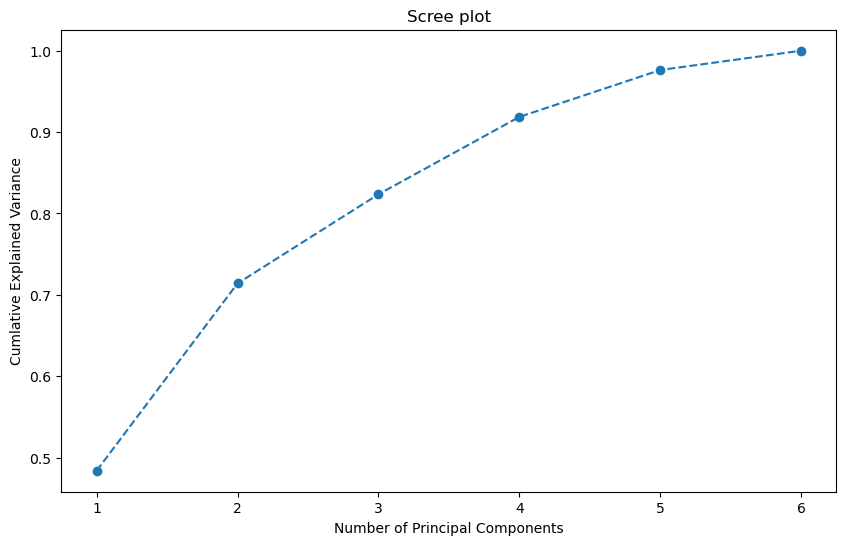

In [191]:
#plot scree plot 
plt.figure(figsize=(10,6))
plt.plot(range(1,len(ratio)+1),ratio.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumlative Explained Variance')
plt.title('Scree plot')
plt.show()

In [192]:
#transform the Original dataset using PCA
# Select the number of components that explain at least 90% of the variance
pca = PCA(n_components=0.9)  # Retain 90% of variance
X_pca = pca.fit_transform(X_s)

print(f'Shape of PCA-transformed data: {X_pca.shape}')
X_pca

Shape of PCA-transformed data: (168, 4)


array([[ 2.91853035e+00,  2.04046538e+00,  4.05350675e-01,
        -4.20048609e-01],
       [ 9.92649518e-01, -1.74283291e-01,  4.11488184e-01,
         6.03089471e-01],
       [ 2.40152074e+00,  3.57646222e-02, -8.52121886e-01,
        -1.12422637e+00],
       [ 2.28770687e+00,  1.78666107e+00, -7.24842024e-01,
        -1.75361657e-01],
       [ 1.26530926e+00,  9.98399590e-01,  8.23188938e-01,
        -5.08960208e-01],
       [ 1.92835521e+00,  1.48476674e+00, -6.17856341e-02,
         2.54112873e-01],
       [ 1.78952396e+00,  6.16978941e-01, -9.83499722e-01,
         8.91959082e-01],
       [ 1.39317750e+00,  1.58178177e+00,  1.11612498e+00,
         7.36162171e-01],
       [ 1.76350318e+00,  1.15471308e+00, -1.02178764e+00,
         1.24926446e+00],
       [ 1.88336118e+00,  3.09202858e-01, -5.82832924e-01,
         5.09487733e-01],
       [ 2.75405710e+00,  6.84898375e-01, -2.14790883e-01,
         3.57639129e-01],
       [ 1.04828063e+00,  3.22018225e-01, -2.06288477e-01,
      

In [193]:
import warnings as warn
warn.filterwarnings('ignore')

# Clustering with Original Data

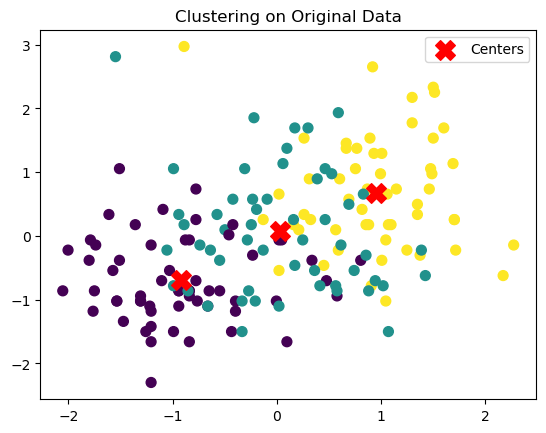

Silhouette Score: 0.35, Davies-Bouldin Index: 1.11


In [194]:
# Apply KMeans clustering on the original data

kM = KMeans(n_clusters=3, random_state=42)
y_kM = kM.fit_predict(X_s)

# Visualize the clusters
plt.scatter(X_s[:, 0], X_s[:, 1], c=y_kM, cmap='viridis', s=50)
plt.scatter(kM.cluster_centers_[:, 0], kM.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centers')
plt.title('Clustering on Original Data')
plt.legend()
plt.show()

# Evaluate clustering
silhouette = silhouette_score(X_s, y_kM)
davies_bouldin = davies_bouldin_score(X_s, y_kM)
print(f'Silhouette Score: {silhouette:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}')


# Clustering with PCA Data

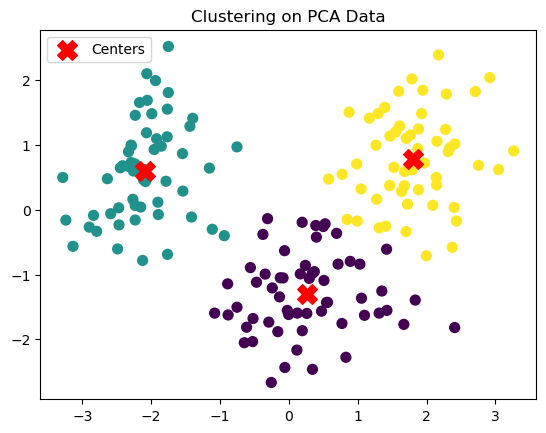

Silhouette Score: 0.40, Davies-Bouldin Index: 0.96


In [195]:
# Apply KMeans clustering on the PCA-transformed data

km_pca = KMeans(n_clusters=3, random_state=42)
y_km_pca = km_pca.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_km_pca, cmap='viridis', s=50)
plt.scatter(km_pca.cluster_centers_[:, 0], km_pca.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centers')
plt.title('Clustering on PCA Data')
plt.legend()
plt.show()

# Evaluate clustering
silhouette_pca = silhouette_score(X_pca, y_km_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca, y_km_pca)
print(f'Silhouette Score: {silhouette_pca:.2f}, Davies-Bouldin Index: {davies_bouldin_pca:.2f}')


# Comparison and Analysis

In [196]:
print(f"Original Data - Silhouette Score:{silhouette:.2f}, Davies-Bouldin Index:{davies_bouldin:.2f}")
print(f"PCA Data - Silhouette Score:{silhouette_pca:.2f}, Davies-Bouldin Index:{davies_bouldin_pca:.2f}")


Original Data - Silhouette Score:0.35, Davies-Bouldin Index:1.11
PCA Data - Silhouette Score:0.40, Davies-Bouldin Index:0.96


# Conclusion and Insights

In [ ]:
#done